# This Notebook is the starting of Capstone Project



In [1]:
%matplotlib inline
from pprint import pprint
import random
import numpy as np
from textwrap import wrap
from datetime import date, datetime
import datetime as dt
from xgboost import XGBClassifier
from rfpimp import *
import pandas as pd
import researchpy as rp
import matplotlib.pyplot as plt
from Methods import *
from Algorithms import *
import seaborn as sns
from sklearn.datasets import make_classification
from geopy.distance import geodesic
from imblearn.under_sampling import RandomUnderSampler
from geopy.distance import great_circle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
FIGS_DIR = 'figs/'
LabelName='SEVERITYCODE'




/Users/yazeed/.conda/envs/Test/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [3]:
INPUT_FILE='Data-Collisions.csv'
df=pd.read_csv(INPUT_FILE)

/Users/yazeed/.conda/envs/Test/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


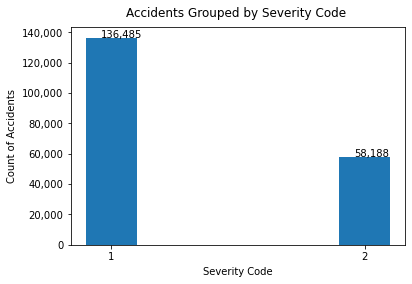

After Performing Under-sampling:


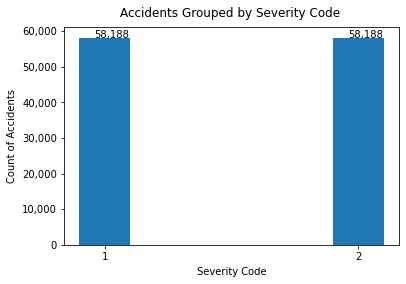

In [4]:
buildFreqChart1(df,LabelName)
df= underSample(df)
#After Under-sampling
print("After Performing Under-sampling:")
buildFreqChart1(df,LabelName)

In [5]:
df=  fixDate(df)

Accidents with Invalid Time=48028


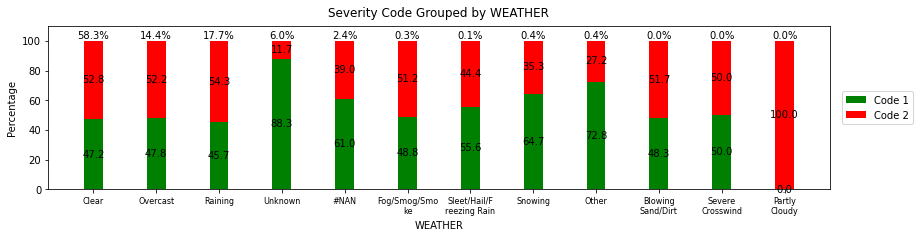

Correlation with WEATHER
                 Chi-square test    results
0  Pearson Chi-square ( 10.0) =   4596.2563
1                     p-value =      0.0000
2                  Cramer's V =      0.2012
Correlation with COLLISIONTYPE
                Chi-square test     results
0  Pearson Chi-square ( 9.0) =   27125.0194
1                    p-value =       0.0000
2                 Cramer's V =       0.4884
Correlation with ADDRTYPE
                Chi-square test    results
0  Pearson Chi-square ( 2.0) =   5185.9720
1                    p-value =      0.0000
2                 Cramer's V =      0.2119
Correlation with ROADCOND
                Chi-square test    results
0  Pearson Chi-square ( 8.0) =   4712.6343
1                    p-value =      0.0000
2                 Cramer's V =      0.2036
Correlation with LIGHTCOND
                Chi-square test    results
0  Pearson Chi-square ( 8.0) =   4490.0854
1                    p-value =      0.0000
2                 Cramer's V =      0.19

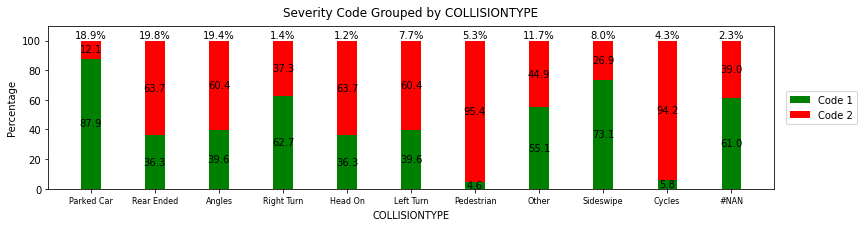

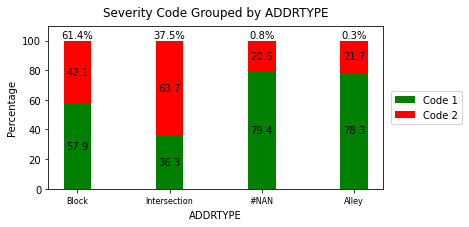

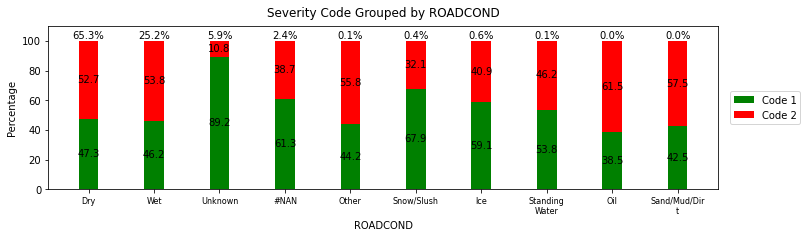

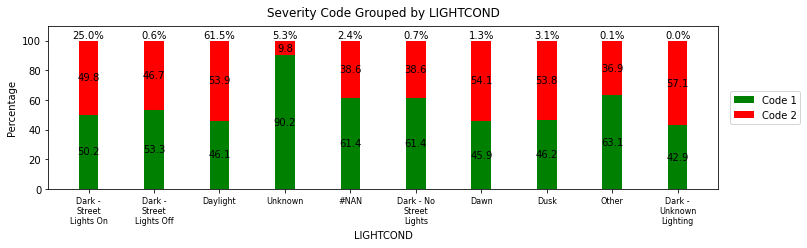

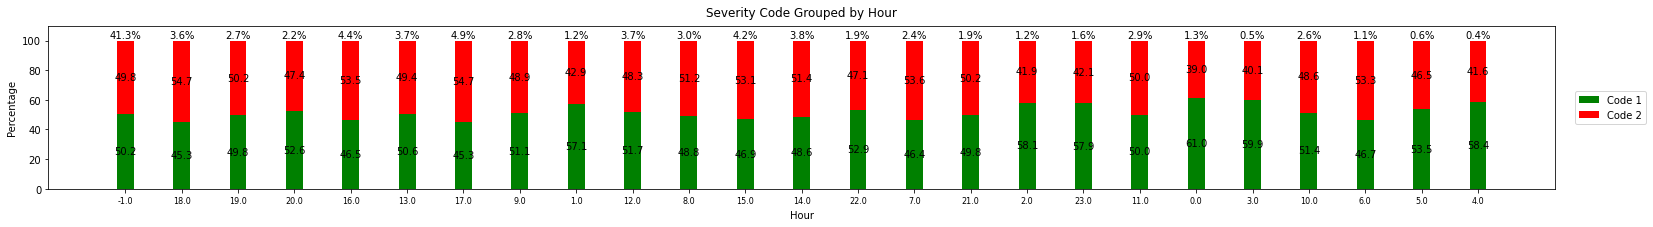

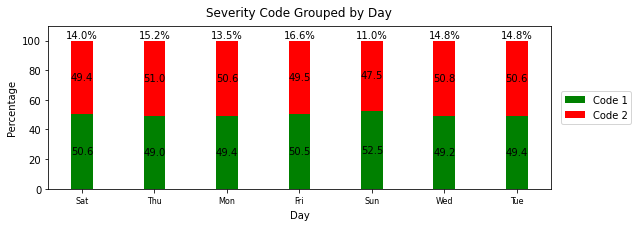

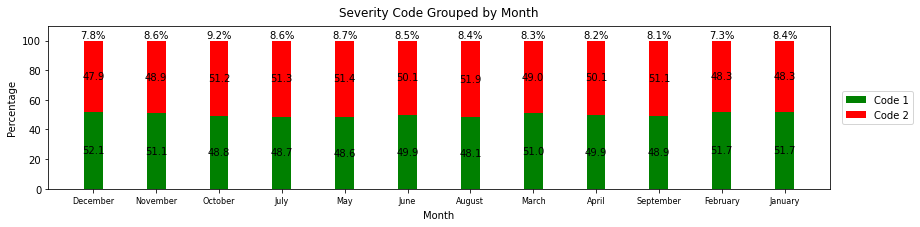

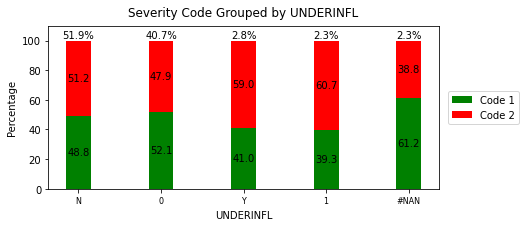

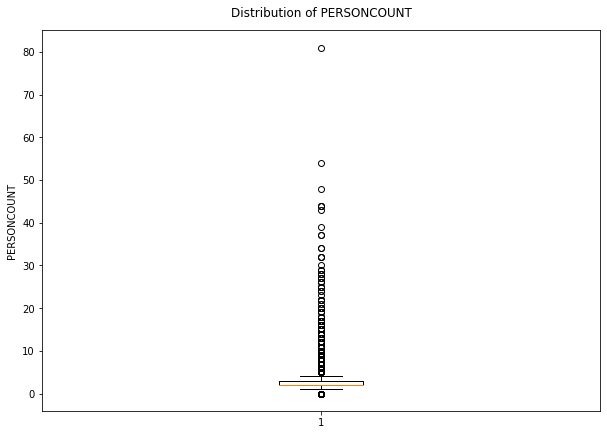

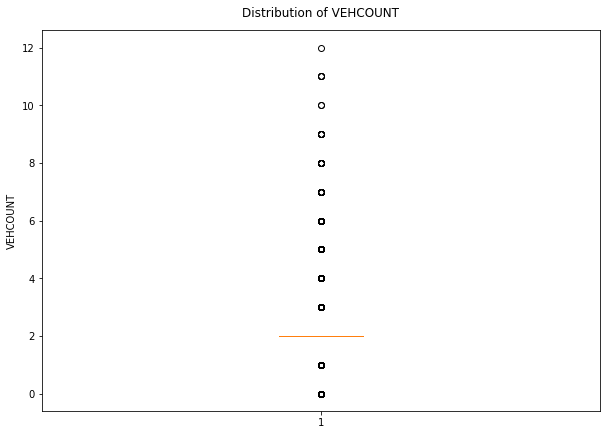

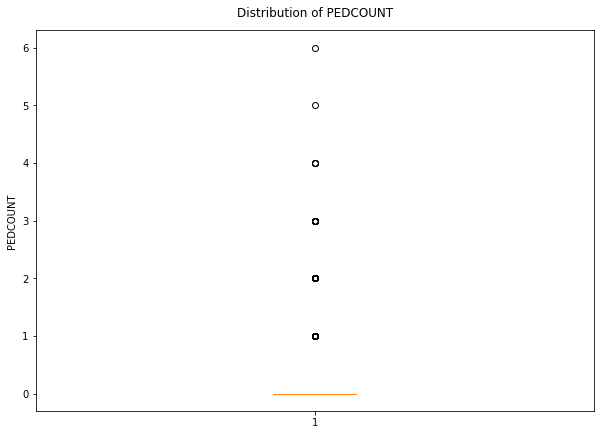

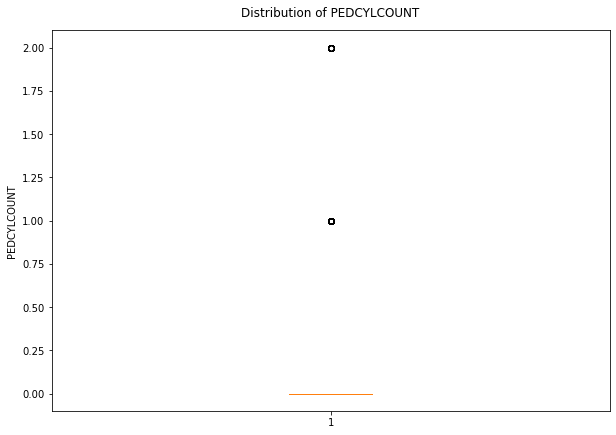

In [6]:
# Keep important features

catCols=['WEATHER','COLLISIONTYPE',"ADDRTYPE",'ROADCOND', 'LIGHTCOND','Hour', 'Day', 'Month', 'UNDERINFL']
numCols= ["PERSONCOUNT", "VEHCOUNT", "PEDCOUNT", "PEDCYLCOUNT"]
df = df.filter(catCols + numCols+ ['SEVERITYCODE'])

for i in catCols:
     buildFreqChart(df,i)
     computeCorCat(df,i)

df.describe()
df.corr()

for i in numCols:
    buildBoxPlot(df,i)
    






In [7]:
df['UNDERINFL'] = df['UNDERINFL'].replace(['1'],'Y')
df['UNDERINFL'] = df['UNDERINFL'].replace(['0'],'N')
# Fill missing values
df["UNDERINFL"] = df["UNDERINFL"].fillna('N')
df["ROADCOND"] = df["ROADCOND"].fillna('Dry')
df["LIGHTCOND"] = df["LIGHTCOND"].fillna('Daylight')
df["ADDRTYPE"] = df["ADDRTYPE"].fillna('Block')
df=df.dropna(subset = ['COLLISIONTYPE'])
for i in numCols:
    df[i].fillna((df[i].mean()), inplace=True)
# Remove Outliers
df= df[df.PERSONCOUNT<9]
df= df[df.VEHCOUNT<5]
df= df[df.VEHCOUNT>0]
df= df[df.PEDCOUNT<3]
df= df[df.PEDCYLCOUNT<2]    
df= df.drop(['WEATHER', 'Hour', 'Day', 'Month', 'UNDERINFL'], axis=1)


Features:
PERSONCOUNT                           int64
VEHCOUNT                              int64
PEDCOUNT                              int64
PEDCYLCOUNT                           int64
SEVERITYCODE                          int64
COLLISIONTYPE_Angles                  uint8
COLLISIONTYPE_Cycles                  uint8
COLLISIONTYPE_Head On                 uint8
COLLISIONTYPE_Left Turn               uint8
COLLISIONTYPE_Other                   uint8
COLLISIONTYPE_Parked Car              uint8
COLLISIONTYPE_Pedestrian              uint8
COLLISIONTYPE_Rear Ended              uint8
COLLISIONTYPE_Right Turn              uint8
COLLISIONTYPE_Sideswipe               uint8
ADDRTYPE_Alley                        uint8
ADDRTYPE_Block                        uint8
ADDRTYPE_Intersection                 uint8
ROADCOND_Dry                          uint8
ROADCOND_Ice                          uint8
ROADCOND_Oil                          uint8
ROADCOND_Other                        uint8
ROADCOND_Sand/Mud/Dirt

[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done   5 out of  10 | elapsed:    5.3s remaining:    5.3s
[Parallel(n_jobs=-3)]: Done  10 out of  10 | elapsed:    8.4s finished


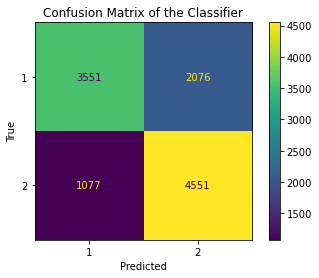

In [8]:
df = pd.get_dummies(df)
randomForest(df)
print ("DONE")





    


















